### GAME OF THRONES series which is most popular webseries in recent days has its origin from the original GAME OF THRONES book series

### So the data is collected from the book in form of a csv file and Exploratory Data Analysis is performed on it

#### importing the libraries

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
battles= pd.read_csv("C:\\Users\\harshith\\Downloads\\battles.csv")

In [ ]:
#this gives us an idea of basic structure of dataset comprising of first five rows in the dataset

In [4]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [ ]:
#the datatypes of the data present in data set is observed

In [5]:
battles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

In [6]:
battles.rename(columns={"attacker_1":"primary_attacker"},inplace=True)
battles.rename(columns={"defender_1":"primary_defender"},inplace=True)
battles.head()

,name,year,battle_number,attacker_king,defender_king,primary_attacker,attacker_2,attacker_3,attacker_4,primary_defender,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [7]:
battles["attacker_king"].value_counts()

Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
Name: attacker_king, dtype: int64

#### above data shows the number of times the kings attacked in the battles
 

In [8]:
battles["defender_king"].value_counts()


Robb Stark                  14
Joffrey/Tommen Baratheon    13
Balon/Euron Greyjoy          4
Stannis Baratheon            2
Mance Rayder                 1
Renly Baratheon              1
Name: defender_king, dtype: int64

#### above data shows the number of times the kings had defended in the battles

In [10]:
battles["location"].value_counts()


Riverrun                                3
Winterfell                              3
Darry                                   2
Moat Cailin                             2
Storm's End                             2
Harrenhal                               2
Deepwood Motte                          2
Torrhen's Square                        2
Seagard                                 1
Castle Black                            1
Ruby Ford                               1
Shield Islands                          1
Dragonstone                             1
Golden Tooth                            1
Stony Shore                             1
Duskendale                              1
Mummer's Ford                           1
Ryamsport, Vinetown, Starfish Harbor    1
King's Landing                          1
Raventree                               1
Crag                                    1
Red Fork                                1
Oxcross                                 1
Saltpans                          

#### above data shows the number of battles fought at the location

In [11]:
battles["region"].value_counts()

The Riverlands     17
The North          10
The Westerlands     3
The Stormlands      3
The Reach           2
The Crownlands      2
Beyond the Wall     1
Name: region, dtype: int64

#### above data shows the number of battles fought at regions in present in story

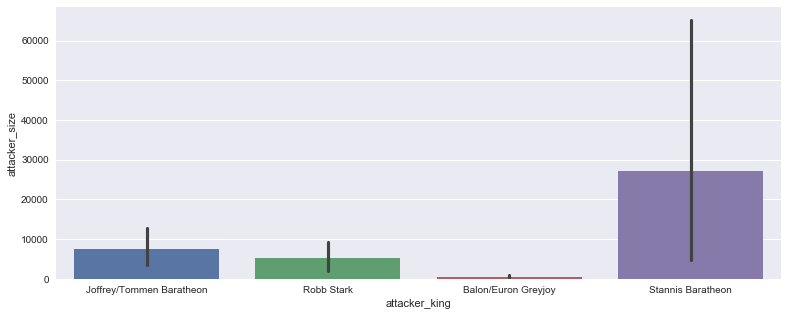

In [13]:
sns.set(rc={"figure.figsize":(13,5)})
sns.barplot(x="attacker_king",y="attacker_size",data= battles)
plt.show()

#### the graph shows that stannis baratheon is king who attacked with highest army size around 28000 next stands Joffrey/Tommen Baratheon who attacked with second highest army around 8000  followed by Robb Stark with 6000 Balon/Euron Greyjoy is king who attackedd with least size of army around 1000-2000

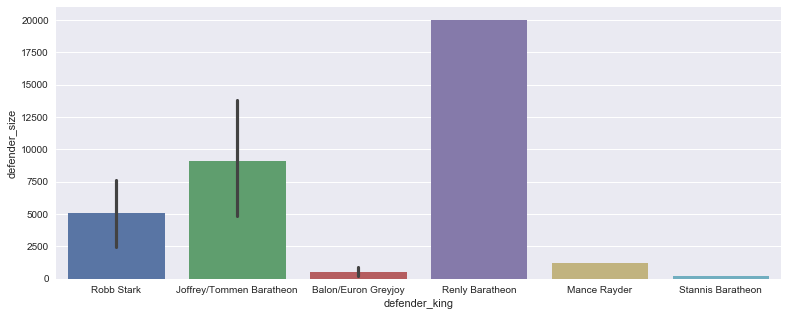

In [14]:
sns.set(rc={"figure.figsize":(13,5)})
sns.barplot(x="defender_king",y="defender_size",data= battles)
plt.show()

#### the graph shows that Renly Baratheon is king with highest defending army of 20000 followed by Joffrey/Tommen Baratheon with army of  8000

#### Stannis Baratheon has less Defending army of 1000.the reason behind is he rules an island country

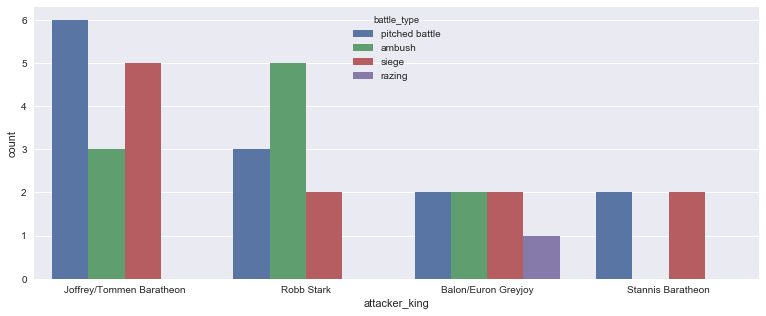

In [18]:
sns.countplot(x=battles["attacker_king"],hue=battles["battle_type"])
plt.show()

#### In Pitched battle type:Joffrey/tommen Baratheon has fought around 6 times and Balon/Eurogreyjoy,Stannis Baratheon has fought 2 times

#### --> In Ambush type : Robb stark fought around 5 times and Stannis Baratheon has never fought in Ambush Battle type

#### --> In Siege type: Joffrey/Tommen Baratheon fought 5 times 

### Next analysis is on the deaths of characters present in the book

In [20]:
Deaths=pd.read_csv("C:\\Users\\harshith\\Downloads\\character-deaths.csv")

In [21]:
Deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [23]:
Deaths.shape

(917, 13)

#### it indiactes that there are 917 deaths on record in the dataset

In [24]:
Deaths["Gender"].value_counts()

1    760
0    157
Name: Gender, dtype: int64

#### it indicates there are 760 male characters and 157 female characters

In [25]:
Deaths["Allegiances"].value_counts()

None               253
Night's Watch      116
Lannister           81
Stark               73
Baratheon           56
Greyjoy             51
Wildling            40
House Stark         35
Martell             25
House Greyjoy       24
Arryn               23
Tully               22
House Lannister     21
House Targaryen     19
Targaryen           17
Tyrell              15
House Martell       12
House Tyrell        11
House Baratheon      8
House Tully          8
House Arryn          7
Name: Allegiances, dtype: int64

#### it indictes the count of members belonging the respective houses or clans

In [26]:
Deaths["Nobility"].value_counts()

0    487
1    430
Name: Nobility, dtype: int64

#### it indicates 430 are Noble family people aand 487 are Non noble family people

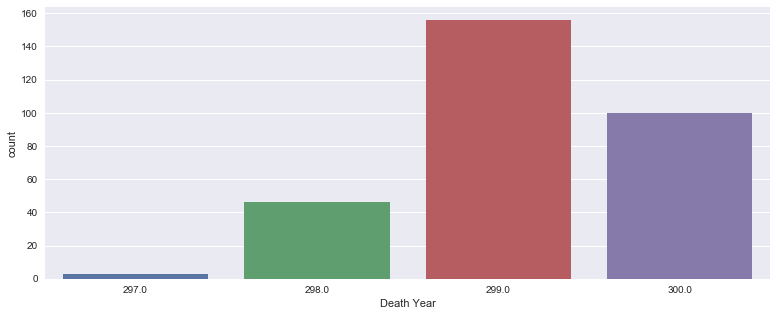

In [27]:
sns.countplot(Deaths['Death Year'])
plt.show()

#### In 297 A.D there are 4 deaths

#### In 298 A.D there are 48 deaths

#### In 299 A.D there are 158 deaths

#### In 300 A.D there are 100 deaths